('증권', 119)
('금융', 94)
('것', 78)
('고객', 64)
('수', 62)
('저', 56)
('투자', 51)
('생각', 47)
('위해', 37)
('한국', 35)
('회사', 33)
('통해', 29)
('증권사', 29)
('대우', 29)
('대한', 28)
('업무', 28)
('등', 25)
('제', 25)
('그', 24)
('관심', 23)
('일', 23)
('지원', 23)
('때', 22)
('가장', 21)
('발전', 21)
('경험', 20)
('관리', 20)
('서비스', 20)
('자산', 20)
('기업', 19)
('분석', 19)
('목표', 19)
('최고', 18)
('주식', 18)
('전문성', 17)
('중', 17)
('를', 16)
('제공', 16)
('업', 16)
('분야', 16)
('때문', 16)
('위', 15)
('성장', 15)
('전공', 15)
('이', 15)
('매력', 15)
('이유', 15)
('사회', 15)
('미래', 14)
('대해', 14)
('현재', 13)
('역량', 13)
('곳', 13)
('가치', 13)
('부문', 13)
('및', 13)
('공부', 13)
('가지', 13)
('사람', 13)
('의', 12)
('시장', 12)
('입사', 12)
('활동', 12)
('관련', 12)
('변화', 12)
('또한', 11)
('점', 11)
('노력', 11)
('인턴', 11)
('선택', 11)
('상품', 10)
('전문가', 10)
('미래에셋', 10)
('더', 10)
('기술', 10)
('경제', 10)
('은행', 10)
('국내', 9)
('역할', 9)
('설계', 9)
('부분', 9)
('성과', 8)
('흥미', 8)
('꿈', 8)
('바탕', 8)
('능력', 8)
('프로젝트', 8)
('산업', 8)
('수익', 8)
('바로', 8)
('지식', 8)
('다른', 8)
('정보', 8)
('아

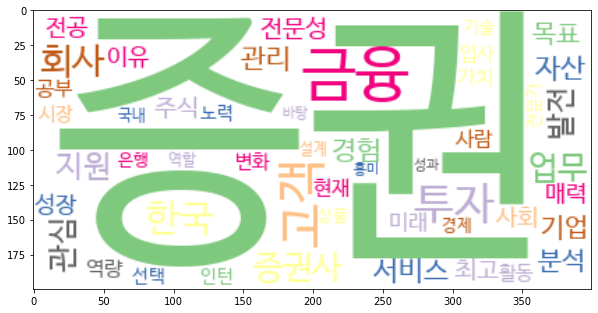

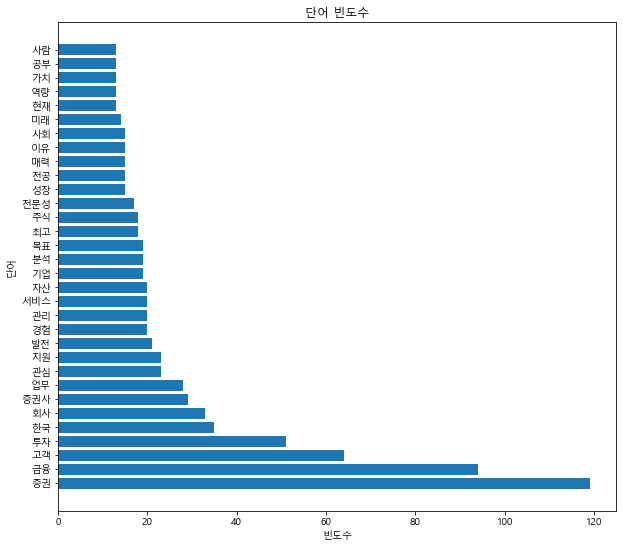

In [2]:
from konlpy.tag import Twitter
from collections import Counter

file = open('지원동기.txt','r',encoding='utf8')
lists=file.read()
file.close()
lists

from konlpy.tag import Okt
okt=Okt()
noun = okt.nouns(lists)
count = Counter(noun)
noun_list = count.most_common(100)
for v in noun_list:
    print(v)

counts = dict(count)

del_words=[]
for word, number in counts.items():
    if len(word)==1:
        del_words.append(word)
del_words

for word in del_words:
        del(counts[word])
counts

counts = sorted(counts.items(), reverse=True, key=lambda item:item[1])
counts

real_count = {}
for word, count in counts:
    if word not in ['생각','위해','통해','대우','대한','가장','제공','분야','때문','대해','부문','가지','관련','또한','미래에셋','부분','바로','다른','중대','이후','부의','화투','시절','먼저','우선','']:
        real_count[word]=count

real_count

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

%matplotlib inline
import matplotlib
from matplotlib import font_manager,rc

wordcloud = WordCloud(font_path='NanumBarunGothic.ttf',background_color='white',colormap='Accent_r',max_words=50,max_font_size=300)
wordcloud_words = wordcloud.generate_from_frequencies(real_count)

array = wordcloud.to_array()
print(type(array))
print(array.shape)
fig = plt.figure(figsize=(10,10))
plt.imshow(array, interpolation='bilinear')
plt.axis=('off')
plt.show()
fig.savefig('project1.png')

# path = 'NanumBarunGothic.ttf'
# fontprop = fm.FontProperties(fname=path, size=18)
font_name = font_manager.FontProperties(fname='malgun.ttf').get_name()
rc('font',family=font_name)

most_words = {}
for i, j in real_count.items():
    if j>12:
        most_words[i]=j
values = list(most_words.values())
name = list(most_words.keys())

plt.figure(figsize=(10,9))
plt.barh(name, values)
plt.title('단어 빈도수')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.show()